# 交易游戏项目数据分析

#### 目录：

### [1.原始数据分布图](#1)

### [2. 观察值归一化，求mean、max](#2)
将数据值根据大小尺度分为四类：1.价格，2.买一二三卖一二三的量，3.总交易量，4.target

求出合适的归一化mean和max值：

```
price_mean = 26863.36
price_max = 28540.0
bid_ask_volume_mean = 8.65
bid_ask_volume_max = 620.0
total_volume_mean = 58283.69
total_volume_max = 205279.0
target_mean = 15.48
target_max = 485.0
```

### [3.归一化数据分布](#3)

### [4.数据变化情况（target, last price）](#4)

### [5.小尺度数据分析（第一天数据）](#5)

In [3]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
all_data = pd.read_csv("/home/shuai/day_1-62.csv")
# print(all_data.info())
# print(all_data.describe())

In [ ]:
all_price = pd.DataFrame(all_data, columns=['LastPrice', 'BidPrice1', 'BidPrice2', 'BidPrice3', 'BidPrice4', 'BidPrice5', 'AskPrice1', 'AskPrice2', 'AskPrice3', 'AskPrice4', 'AskPrice5', 'HighestPrice', 'LowestPrice'])
bid_ask_volume = pd.DataFrame(all_data, columns=['BidVolume1', 'BidVolume2', 'BidVolume3', 'BidVolume4', 'BidVolume5', 'AskVolume1', 'AskVolume2', 'AskVolume3', 'AskVolume4', 'AskVolume5'])
total_volume = pd.DataFrame(all_data, columns=['Volume'])
target_num = pd.DataFrame(all_data, columns=['Target_Num'])

In [79]:
all_data.head()

,Done,LastPrice,BidPrice1,BidVolume1,AskPrice1,AskVolume1,BidPrice2,BidVolume2,AskPrice2,AskVolume2,BidPrice3,BidVolume3,AskPrice3,AskVolume3,BidPrice4,BidVolume4,AskPrice4,AskVolume4,BidPrice5,BidVolume5,AskPrice5,AskVolume5,Volume,HighestPrice,LowestPrice,TradingDay,Target_Num,Actual_Num,AliveBidPrice1,AliveBidVolume1,AliveBidPrice2,AliveBidVolume2,AliveBidPrice3,AliveBidVolume3,AliveAskPrice1,AliveAskVolume1,AliveAskPrice2,AliveAskVolume2,AliveAskPrice3,AliveAskVolume3,score,profit,total_profit
0,0,25835,25830,2,25838,3,25825,3,25839,5,25824,1,25840,4,25823,1,25847,1,25811,1,25848,2,284,25835,25835,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,25835,25830,2,25838,3,25825,3,25839,5,25824,1,25840,4,25823,1,25847,1,25811,1,25848,2,284,25835,25835,1,-4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,25835,25830,2,25838,3,25825,3,25839,5,25824,1,25840,4,25823,1,25847,1,25811,1,25848,2,284,25835,25835,1,-4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,25835,25827,1,25830,3,25825,3,25835,2,25824,1,25838,10,25823,4,25839,7,25813,3,25840,6,284,25835,25835,1,-4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,25835,25827,1,25830,3,25825,3,25835,2,25824,1,25838,10,25823,4,25839,7,25813,3,25840,6,284,25835,25835,1,-4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<a id='1'></a>
### 1.原始数据分布图

注：最新价存在几个为零的点。

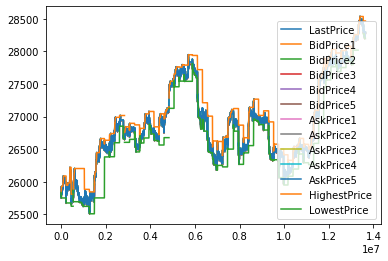

In [12]:
all_price[all_price > 0].plot()

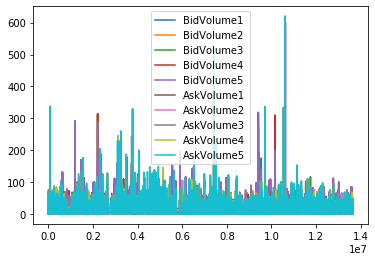

In [14]:
bid_ask_volume.plot()

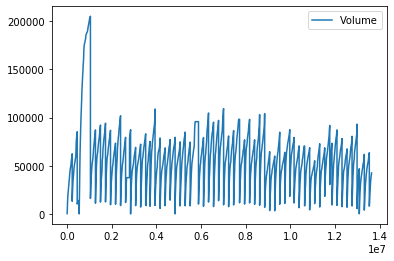

In [15]:
total_volume.plot()

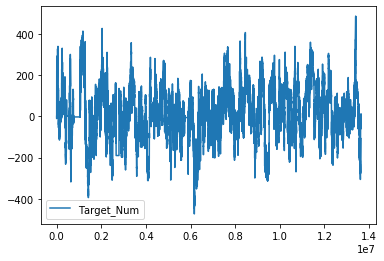

In [16]:
target_num.plot()

<a id='2'></a>
### 2. 观察值归一化，求mean、max

In [18]:
price_describe = all_price[all_price > 0].describe()
price_mean = sum(price_describe.iloc[1])/13
price_max = max(price_describe.iloc[7])
print(price_mean, price_max)

26863.361643042244 28540.0


In [19]:
bid_ask_volume_describe = bid_ask_volume[bid_ask_volume > 0].describe()
bid_ask_volume_mean = sum(bid_ask_volume_describe.iloc[1])/10
bid_ask_volume_max = max(bid_ask_volume_describe.iloc[7])
print(bid_ask_volume_mean, bid_ask_volume_max)

8.645898619241628 620.0


In [20]:
total_volume_describe = total_volume.describe()
total_volume_mean = sum(total_volume_describe.iloc[1])
total_volume_max = max(total_volume_describe.iloc[7])
print(total_volume_mean, total_volume_max)

58283.69322998556 205279.0


In [21]:
target_describe = Target_Num.describe()
target_mean = sum(target_describe.iloc[1])
target_max = max(target_describe.iloc[7])
print(target_mean, target_max)

15.4756337232315 485.0


In [3]:
price_mean = 26863.36
price_max = 28540.0
bid_ask_volume_mean = 8.65
bid_ask_volume_max = 620.0
total_volume_mean = 58283.69
total_volume_max = 205279.0
target_mean = 15.48
target_max = 485.0

In [25]:
all_price_n = (all_price-price_mean)/(price_max-price_mean)
bid_ask_volume_n = (bid_ask_volume-bid_ask_volume_mean)/(bid_ask_volume_max-bid_ask_volume_mean)
total_volume_n = (total_volume-total_volume_mean)/(total_volume_max-total_volume_mean)
target_n = (Target_Num-target_mean)/(target_max-target_mean)

注：归一化特殊值（如最新价的0）

In [31]:
all_price_n[all_price_n < -1] = -1
all_price_n[all_price_n > 1] = 1
bid_ask_volume_n[bid_ask_volume_n < -1] = -1
bid_ask_volume_n[bid_ask_volume_n > 1] = 1
total_volume_n[total_volume_n < -1] = -1
total_volume_n[total_volume_n > 1] = 1
target_n[target_n < -1] = -1
target_n[target_n > 1] = 1

<a id='3'></a>
### 3.归一化数据分布

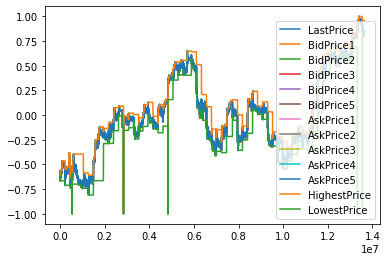

In [6]:
all_price_n.plot()

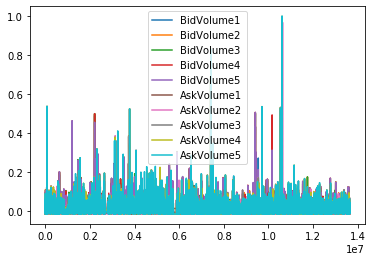

In [27]:
bid_ask_volume_n.plot()

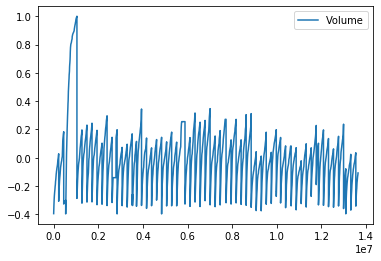

In [28]:
total_volume_n.plot()

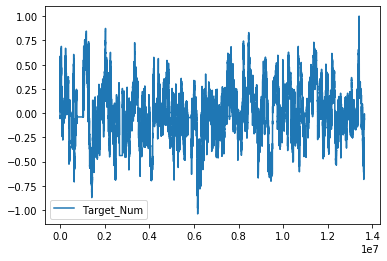

In [29]:
target_n.plot()

<a id='4'></a>
### 4.数据变化情况（target, last price）

In [4]:
day_data = []
for i in range(1, 63):
    day_data.append(all_data[all_data['TradingDay']==i])

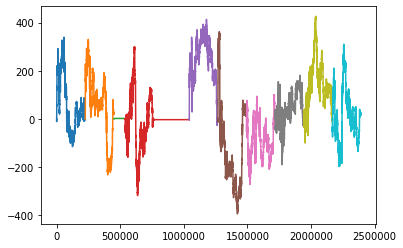

In [5]:
for i in range(0, 10):
    day_data[i]["Target_Num"].plot()

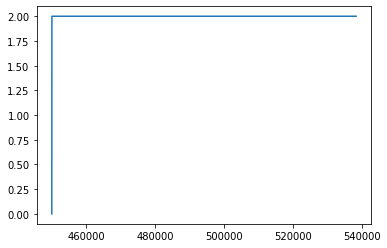

In [7]:
day_data[2]["Target_Num"].plot()

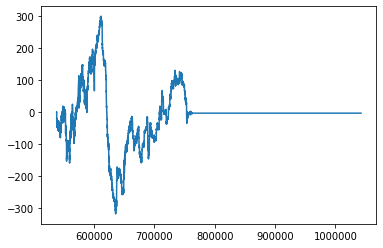

In [22]:
day_data[3]["Target_Num"].plot()

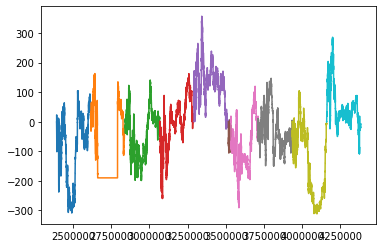

In [18]:
for i in range(10, 20):
    day_data[i]["Target_Num"].plot()

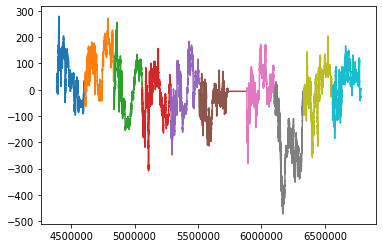

In [19]:
for i in range(20, 30):
    day_data[i]["Target_Num"].plot()

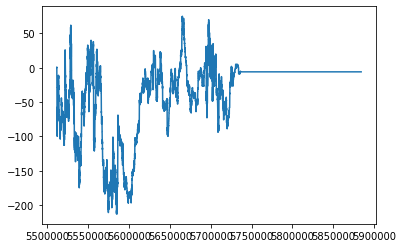

In [23]:
day_data[25]["Target_Num"].plot()

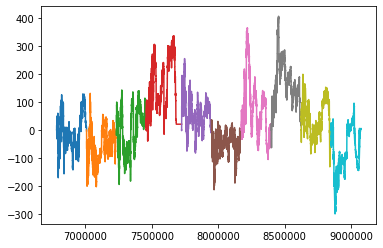

In [20]:
for i in range(30, 40):
    day_data[i]["Target_Num"].plot()

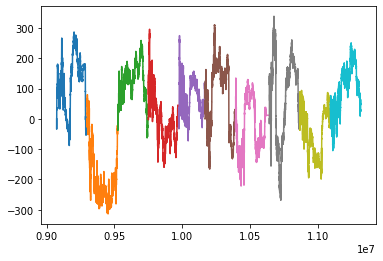

In [21]:
for i in range(40, 50):
    day_data[i]["Target_Num"].plot()

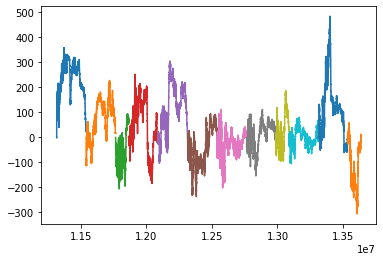

In [22]:
for i in range(50, 62):
    day_data[i]["Target_Num"].plot()

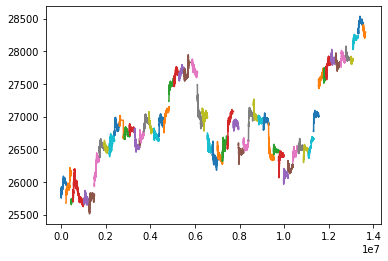

In [46]:
for i in range(0, 62):
    day_data[i]["LastPrice"][day_data[i]["LastPrice"]>0].plot()

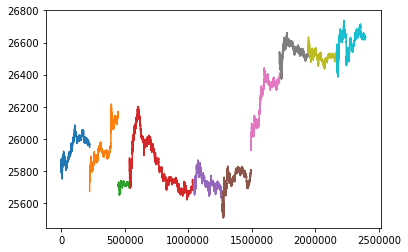

In [37]:
for i in range(0, 10):
    day_data[i]["LastPrice"][day_data[i]["LastPrice"]>0].plot()

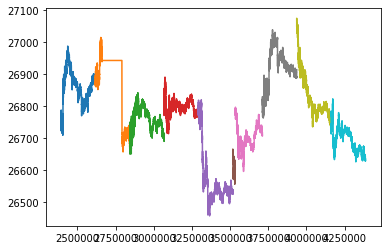

In [39]:
for i in range(10, 20):
    day_data[i]["LastPrice"][day_data[i]["LastPrice"]>0].plot()

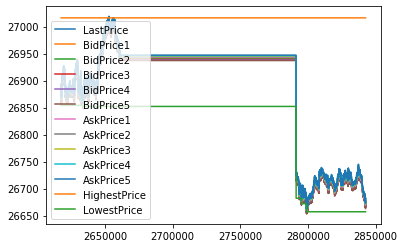

In [15]:
day12_price.plot()

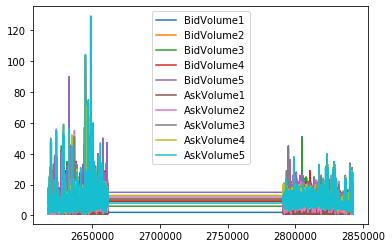

In [19]:
day12_bid_ask_volume.plot()

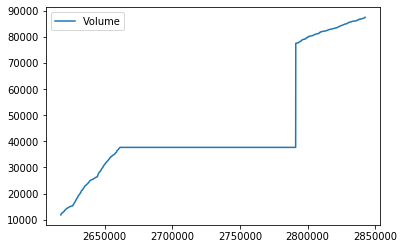

In [20]:
day12_total_volume.plot()

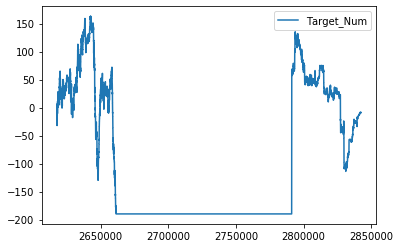

In [21]:
day12_target_num.plot()

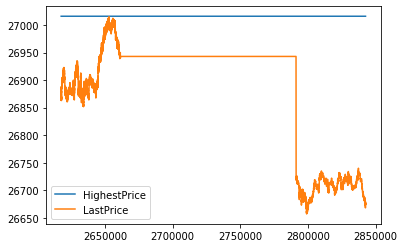

In [12]:
day12_price[["HighestPrice", 'LastPrice']].plot()

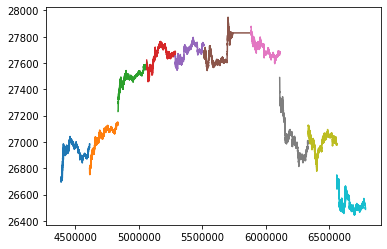

In [40]:
for i in range(20, 30):
    day_data[i]["LastPrice"][day_data[i]["LastPrice"]>0].plot()

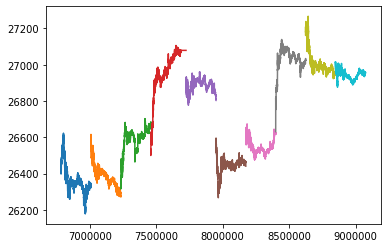

In [41]:
for i in range(30, 40):
    day_data[i]["LastPrice"][day_data[i]["LastPrice"]>0].plot()

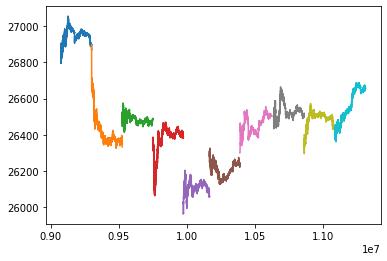

In [42]:
for i in range(40, 50):
    day_data[i]["LastPrice"][day_data[i]["LastPrice"]>0].plot()

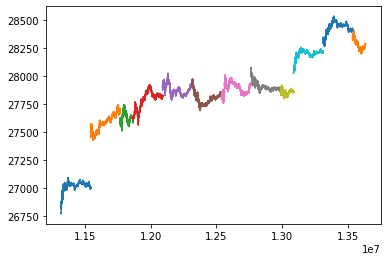

In [44]:
for i in range(50, 62):
    day_data[i]["LastPrice"][day_data[i]["LastPrice"]>0].plot()

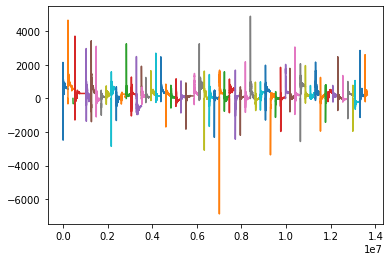

In [49]:
for i in range(0, 62):
    day_data[i]["score"].plot()

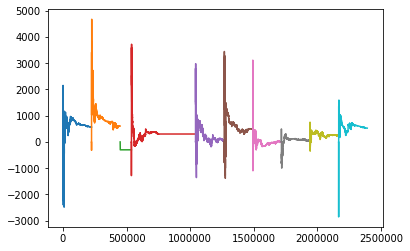

In [50]:
for i in range(0, 10):
    day_data[i]["score"].plot()

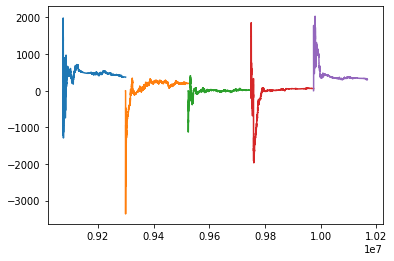

In [53]:
for i in range(40, 45):
    day_data[i]["score"].plot()

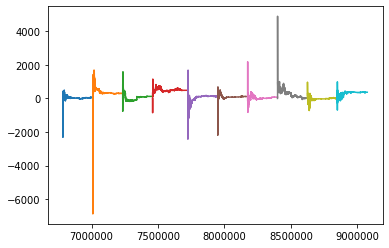

In [48]:
for i in range(30, 40):
    day_data[i]["score"].plot()

<a id='5'></a>
### 5.小尺度数据分析（第一天数据）

In [36]:
day3_price = pd.DataFrame(day_data[2], columns=['LastPrice', 'BidPrice1', 'BidPrice2', 'BidPrice3', 'BidPrice4', 'BidPrice5', 'AskPrice1', 'AskPrice2', 'AskPrice3', 'AskPrice4', 'AskPrice5', 'HighestPrice', 'LowestPrice'])
day3_bid_ask_volume = pd.DataFrame(day_data[2], columns=['BidVolume1', 'BidVolume2', 'BidVolume3', 'BidVolume4', 'BidVolume5', 'AskVolume1', 'AskVolume2', 'AskVolume3', 'AskVolume4', 'AskVolume5'])
day3_total_volume = pd.DataFrame(day_data[2], columns=['Volume'])
day3_target_num = pd.DataFrame(day_data[2], columns=['Target_Num'])

In [37]:
day4_price = pd.DataFrame(day_data[3], columns=['LastPrice', 'BidPrice1', 'BidPrice2', 'BidPrice3', 'BidPrice4', 'BidPrice5', 'AskPrice1', 'AskPrice2', 'AskPrice3', 'AskPrice4', 'AskPrice5', 'HighestPrice', 'LowestPrice'])
day4_bid_ask_volume = pd.DataFrame(day_data[3], columns=['BidVolume1', 'BidVolume2', 'BidVolume3', 'BidVolume4', 'BidVolume5', 'AskVolume1', 'AskVolume2', 'AskVolume3', 'AskVolume4', 'AskVolume5'])
day4_total_volume = pd.DataFrame(day_data[3], columns=['Volume'])
day4_target_num = pd.DataFrame(day_data[3], columns=['Target_Num'])

In [ ]:
day12_price = pd.DataFrame(day_data[11], columns=['LastPrice', 'BidPrice1', 'BidPrice2', 'BidPrice3', 'BidPrice4', 'BidPrice5', 'AskPrice1', 'AskPrice2', 'AskPrice3', 'AskPrice4', 'AskPrice5', 'HighestPrice', 'LowestPrice'])
day12_bid_ask_volume = pd.DataFrame(day_data[11], columns=['BidVolume1', 'BidVolume2', 'BidVolume3', 'BidVolume4', 'BidVolume5', 'AskVolume1', 'AskVolume2', 'AskVolume3', 'AskVolume4', 'AskVolume5'])
day12_total_volume = pd.DataFrame(day_data[11], columns=['Volume'])
day12_target_num = pd.DataFrame(day_data[11], columns=['Target_Num'])

In [23]:
day26_price = pd.DataFrame(day_data[25], columns=['LastPrice', 'BidPrice1', 'BidPrice2', 'BidPrice3', 'BidPrice4', 'BidPrice5', 'AskPrice1', 'AskPrice2', 'AskPrice3', 'AskPrice4', 'AskPrice5', 'HighestPrice', 'LowestPrice'])
day26_bid_ask_volume = pd.DataFrame(day_data[25], columns=['BidVolume1', 'BidVolume2', 'BidVolume3', 'BidVolume4', 'BidVolume5', 'AskVolume1', 'AskVolume2', 'AskVolume3', 'AskVolume4', 'AskVolume5'])
day26_total_volume = pd.DataFrame(day_data[25], columns=['Volume'])
day26_target_num = pd.DataFrame(day_data[25], columns=['Target_Num'])

In [24]:
day34_price = pd.DataFrame(day_data[33], columns=['LastPrice', 'BidPrice1', 'BidPrice2', 'BidPrice3', 'BidPrice4', 'BidPrice5', 'AskPrice1', 'AskPrice2', 'AskPrice3', 'AskPrice4', 'AskPrice5', 'HighestPrice', 'LowestPrice'])
day34_bid_ask_volume = pd.DataFrame(day_data[33], columns=['BidVolume1', 'BidVolume2', 'BidVolume3', 'BidVolume4', 'BidVolume5', 'AskVolume1', 'AskVolume2', 'AskVolume3', 'AskVolume4', 'AskVolume5'])
day34_total_volume = pd.DataFrame(day_data[33], columns=['Volume'])
day34_target_num = pd.DataFrame(day_data[33], columns=['Target_Num'])

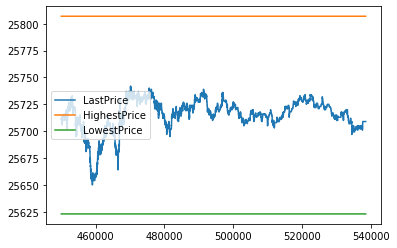

In [47]:
day3_price[["LastPrice", "HighestPrice", "LowestPrice"]].plot()

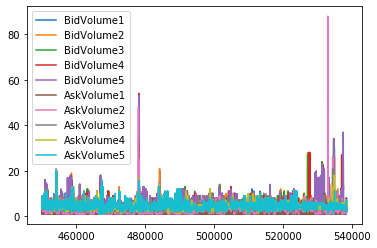

In [39]:
day3_bid_ask_volume.plot()

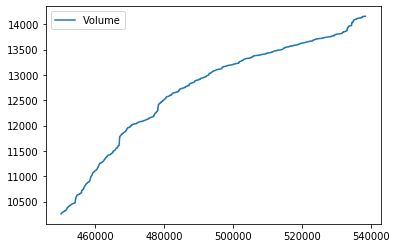

In [40]:
day3_total_volume.plot()

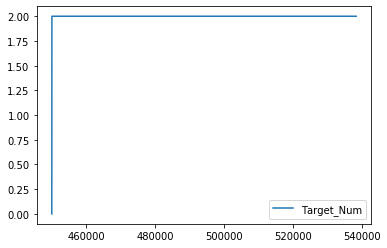

In [41]:
day3_target_num.plot()

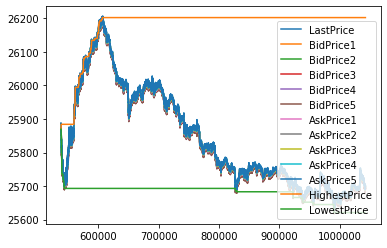

In [46]:
day4_price[day4_price>0].plot()

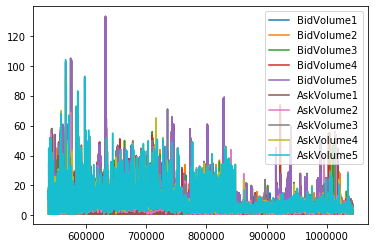

In [43]:
day4_bid_ask_volume.plot()

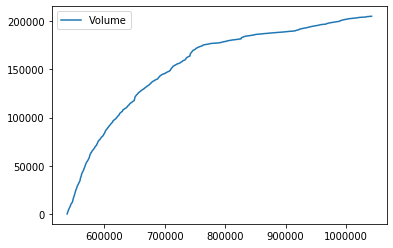

In [44]:
day4_total_volume.plot()

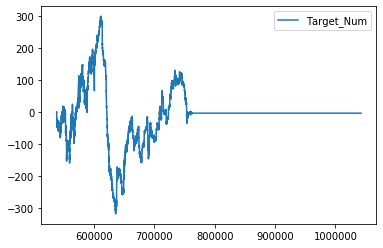

In [45]:
day4_target_num.plot()

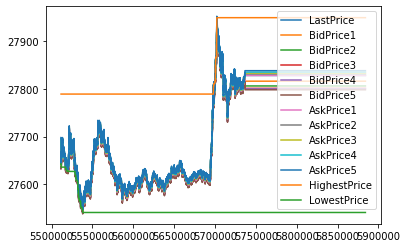

In [25]:
day26_price.plot()

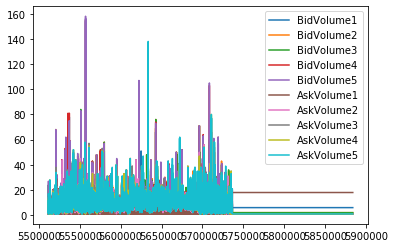

In [29]:
day26_bid_ask_volume.plot()

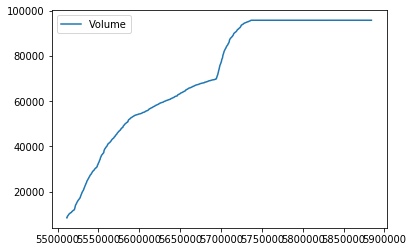

In [27]:
day26_total_volume.plot()

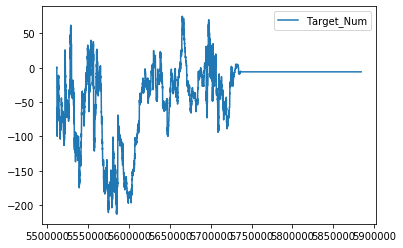

In [26]:
day26_target_num.plot()

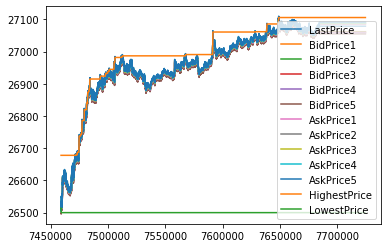

In [32]:
day34_price.plot()

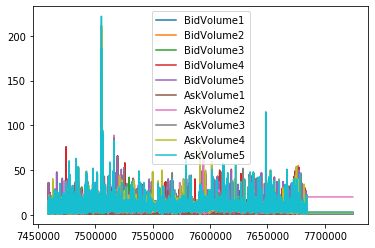

In [33]:
day34_bid_ask_volume.plot()

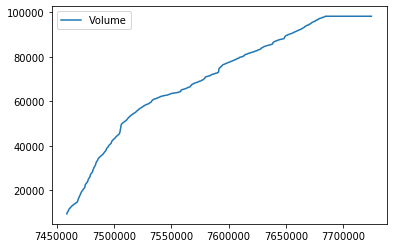

In [34]:
day34_total_volume.plot()

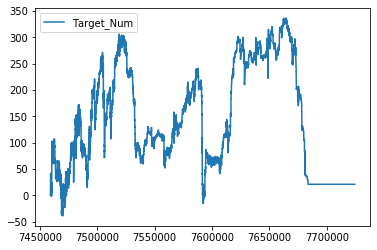

In [35]:
day34_target_num.plot()

In [48]:
day1 = day_data[0]

In [50]:
all_price = pd.DataFrame(day1, columns=['LastPrice', 'BidPrice1', 'BidPrice2', 'BidPrice3', 'BidPrice4', 'BidPrice5', 'AskPrice1', 'AskPrice2', 'AskPrice3', 'AskPrice4', 'AskPrice5', 'HighestPrice', 'LowestPrice'])
bid_ask_volume = pd.DataFrame(day1, columns=['BidVolume1', 'BidVolume2', 'BidVolume3', 'BidVolume4', 'BidVolume5', 'AskVolume1', 'AskVolume2', 'AskVolume3', 'AskVolume4', 'AskVolume5'])
total_volume = pd.DataFrame(day1, columns=['Volume'])
target_num = pd.DataFrame(day1, columns=['Target_Num'])

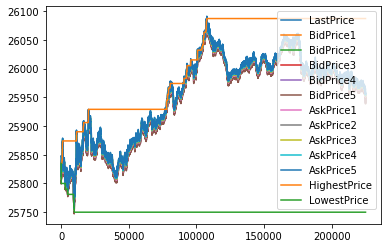

In [51]:
all_price.plot()

In [53]:
all_price_n = (all_price-price_mean)/(price_max-price_mean)
bid_ask_volume_n = (bid_ask_volume-bid_ask_volume_mean)/(bid_ask_volume_max-bid_ask_volume_mean)
total_volume_n = (total_volume-total_volume_mean)/(total_volume_max-total_volume_mean)
target_n = (target_num-target_mean)/(target_max-target_mean)

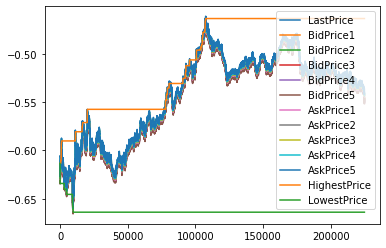

In [54]:
all_price_n.plot()

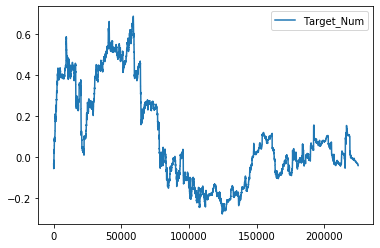

In [60]:
target_n.plot()

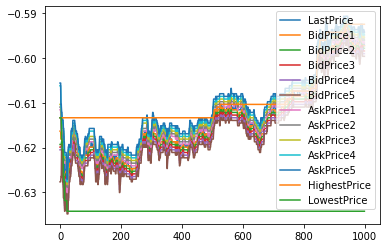

In [55]:
all_price_n.iloc[:1000].plot()

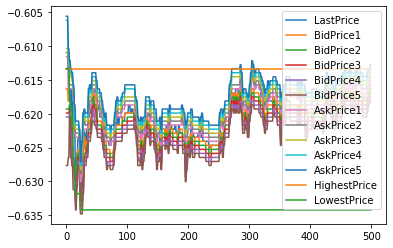

In [56]:
all_price_n.iloc[:500].plot()

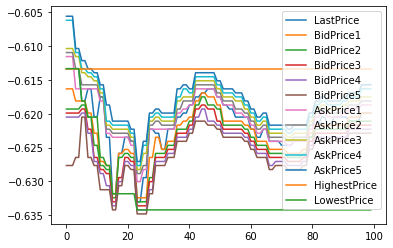

In [57]:
all_price_n.iloc[:100].plot()

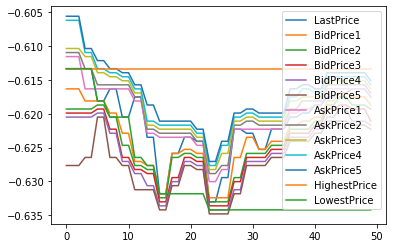

In [58]:
all_price_n.iloc[:50].plot()

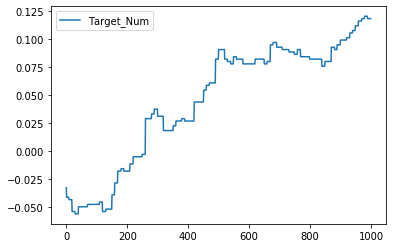

In [61]:
target_n.iloc[:1000].plot()

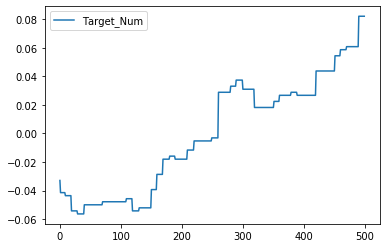

In [62]:
target_n.iloc[:500].plot()

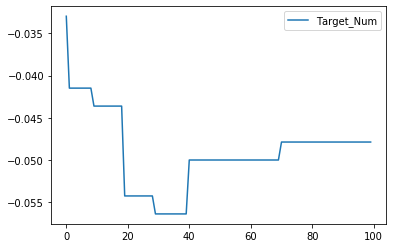

In [63]:
target_n.iloc[:100].plot()

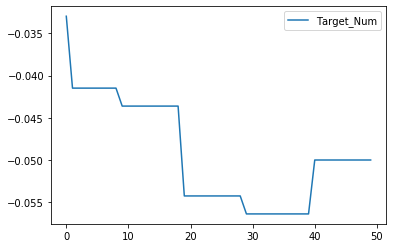

In [59]:
target_n.iloc[:50].plot()

In [65]:
day1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225016 entries, 0 to 225015
Data columns (total 43 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   Done             225016 non-null  int64
 1   LastPrice        225016 non-null  int64
 2   BidPrice1        225016 non-null  int64
 3   BidVolume1       225016 non-null  int64
 4   AskPrice1        225016 non-null  int64
 5   AskVolume1       225016 non-null  int64
 6   BidPrice2        225016 non-null  int64
 7   BidVolume2       225016 non-null  int64
 8   AskPrice2        225016 non-null  int64
 9   AskVolume2       225016 non-null  int64
 10  BidPrice3        225016 non-null  int64
 11  BidVolume3       225016 non-null  int64
 12  AskPrice3        225016 non-null  int64
 13  AskVolume3       225016 non-null  int64
 14  BidPrice4        225016 non-null  int64
 15  BidVolume4       225016 non-null  int64
 16  AskPrice4        225016 non-null  int64
 17  AskVolume4       225016 non-n

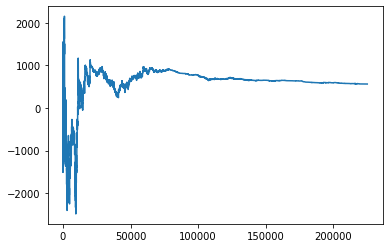

In [80]:
day1['score '].plot()

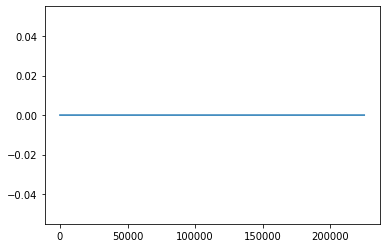

In [81]:
day1['profit'].plot()